In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip

--2024-08-22 18:25:49--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.207, 172.253.63.207, 142.250.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  81.0MB/s    in 0.8s    

2024-08-22 18:25:50 (81.0 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import numpy as np
import cv2
import os
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def load_images_from_folder(folder):
  images=[]
  labels=[]
  for filename in os.listdir(folder):
    img=cv2.imread(os.path.join(folder,filename))
    if img is not None:
      img=cv2.resize(img,(64,64))
      images.append(img)
      label=1 if 'dog' in filename else 0
      labels.append(label)
  return images,labels

array([[[138, 140, 140],
        [138, 141, 141],
        [141, 143, 143],
        ...,
        [176, 185, 185],
        [164, 169, 170],
        [154, 164, 164]],

       [[140, 142, 142],
        [140, 142, 142],
        [140, 142, 142],
        ...,
        [172, 180, 187],
        [169, 171, 179],
        [168, 172, 173]],

       [[140, 142, 142],
        [140, 142, 142],
        [140, 145, 144],
        ...,
        [173, 183, 183],
        [173, 178, 179],
        [168, 173, 172]],

       ...,

       [[161, 167, 166],
        [162, 168, 167],
        [161, 169, 168],
        ...,
        [151, 165, 164],
        [148, 163, 162],
        [152, 164, 162]],

       [[152, 163, 161],
        [154, 165, 163],
        [153, 164, 162],
        ...,
        [152, 164, 164],
        [150, 162, 162],
        [151, 164, 162]],

       [[154, 164, 160],
        [154, 166, 161],
        [155, 164, 162],
        ...,
        [150, 163, 162],
        [151, 164, 163],
        [150, 164, 163]]], dtype=uint8)
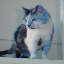

In [ ]:
cat_images,cat_labels=load_images_from_folder('cats_and_dogs_filtered/train/cats')
dog_images,dog_labels=load_images_from_folder('cats_and_dogs_filtered/train/dogs')
cat_images[0]

In [ ]:
images=np.array(cat_images+dog_images)
labels=np.array(cat_labels+dog_labels)
#Flatten the images
images=images.reshape(images.shape[0],-1) # it converts multi-dimensional array to 1-d array.
images=images.astype('float32')/255#converts the pixel values of the images to a floating-point format and scales them to the range [0, 1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
clf = svm.SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 55.25%
